## **Zeotap Data Science Internship Task**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

Understanding the Data

In [ ]:
drive.mount('/content/drive')
customers_path = '/content/drive/MyDrive/ZeoTap/Customers.csv'
products_path = '/content/drive/MyDrive/ZeoTap/Products.csv'
transactions_path = '/content/drive/MyDrive/ZeoTap/Transactions.csv'
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)
customers.head()
products.head()
transactions.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
# Check for missing values
print("Missing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

# Check data types
print("\nData Types:")
print("Customers:", customers.dtypes)
print("Products:", products.dtypes)
print("Transactions:", transactions.dtypes)

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0

Data Types:
Customers: CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
Products: ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
Transactions: TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


# Data Understanding

### Customer Distribution

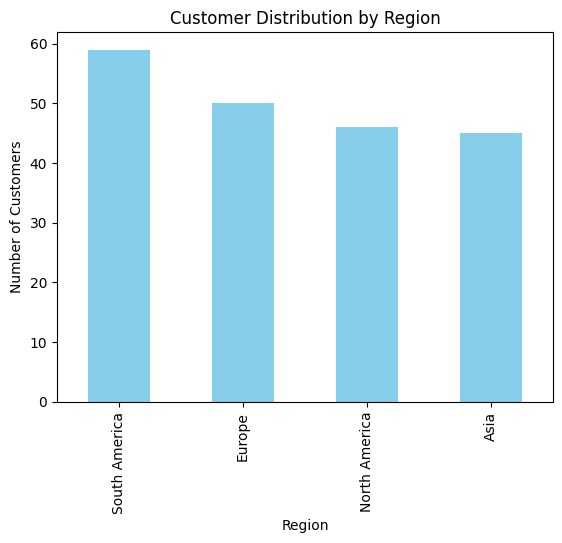

In [ ]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Distribution by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

### Total Sales by products Category

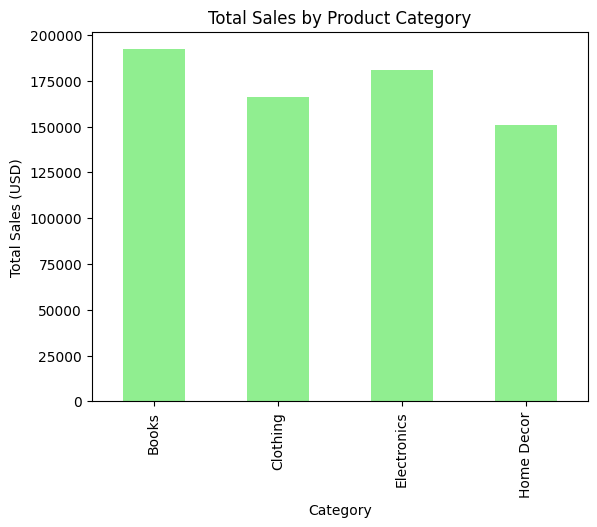

In [ ]:
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='bar', title='Total Sales by Product Category', color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()

### Transaction Trends Over Time:

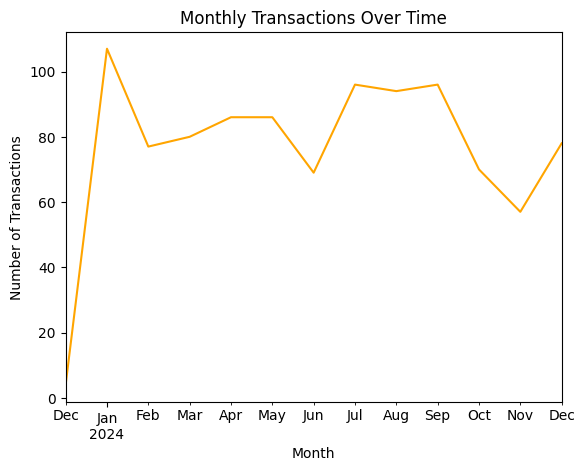

In [ ]:
transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Monthly Transactions Over Time', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

### Top 15 Products by Sale of the products

<ipython-input-11-73ccb26ee36e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='TotalValue', y='ProductName', palette='viridis')


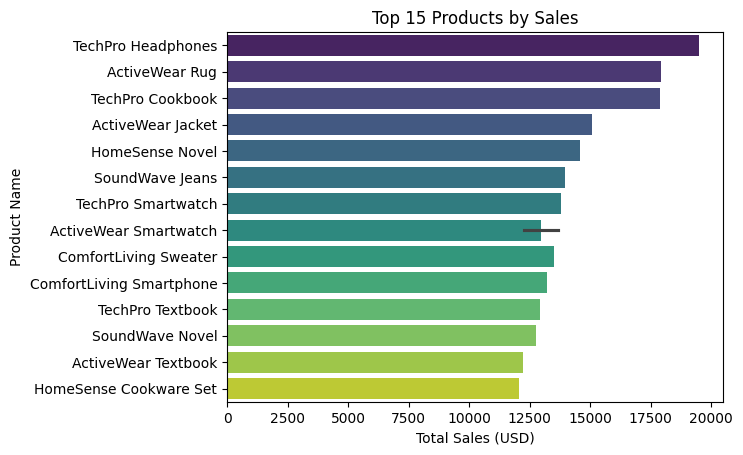

In [ ]:
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(15)
product_sales = product_sales.reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID')
sns.barplot(data=product_sales, x='TotalValue', y='ProductName', palette='viridis')
plt.title('Top 15 Products by Sales')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')
plt.show()

# Business Insights from my understanding of Data

Regional Trends

In [ ]:
transactions_customers = transactions.merge(customers, on='CustomerID')
avg_transaction_by_region = transactions_customers.groupby('Region')['TotalValue'].mean()
print("Average Transaction Value by Region:")
print(avg_transaction_by_region)
highest_region = avg_transaction_by_region.idxmax()
highest_value = avg_transaction_by_region.max()
print(f"Customers in {highest_region} have the highest average transaction value of ${highest_value:.2f}.")

Average Transaction Value by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64
Customers in South America have the highest average transaction value of $721.55.


Customer Retention or Revenue from Recent Signups

In [ ]:
cutoff_date = pd.to_datetime('today') - pd.DateOffset(months=6)
recent_customers = customers[customers['SignupDate'] >= cutoff_date]
recent_transactions = transactions.merge(recent_customers, on='CustomerID')
recent_revenue = recent_transactions['TotalValue'].sum()
total_revenue = transactions['TotalValue'].sum()
recent_revenue_percentage = (recent_revenue / total_revenue) * 100
print(f"Recent customers (last 6 months) contribute {recent_revenue_percentage:.2f}% of total revenue.")


Recent customers (last 6 months) contribute 16.17% of total revenue.


Percentage revenue generated from all category

In [ ]:
transactions_products = transactions.merge(products, on='ProductID')
category_revenue = transactions_products.groupby('Category')['TotalValue'].sum()


In [ ]:
category_percentage = (category_revenue / category_revenue.sum()) * 100
print("Percentage Revenue by Category:")
print(category_percentage)

Percentage Revenue by Category:
Category
Books          27.847639
Clothing       24.082859
Electronics    26.200676
Home Decor     21.868826
Name: TotalValue, dtype: float64


Seasonal Patterns:

In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

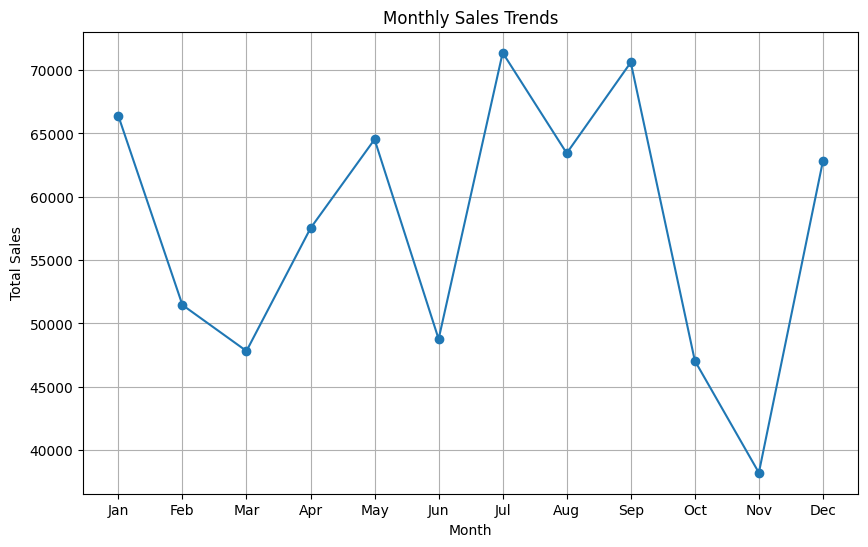

In [ ]:
# Creating a line plot to visualize monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.grid(True)
plt.show()

In [ ]:
# Calculating seasonal indices(sales for each month divided by average sales)
monthly_avg = monthly_sales.mean()
seasonal_indices = monthly_sales / monthly_avg
print("Seasonal Indices:")
print(seasonal_indices)

Seasonal Indices:
Month
1     1.154379
2     0.894950
3     0.831809
4     1.000338
5     1.122229
6     0.848200
7     1.241163
8     1.103255
9     1.227899
10    0.818496
11    0.664776
12    1.092507
Name: TotalValue, dtype: float64


Top Products Revenue Collection

In [ ]:
product_revenue = transactions.groupby('ProductID')['TotalValue'].sum()
top_products_revenue = product_revenue.sort_values(ascending=False).head(10)
top_products = top_products_revenue.reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID')
top_10_revenue = top_products_revenue.sum()
top_10_percentage = (top_10_revenue / total_revenue) * 100
print(f"The top 10 products contribute {top_10_percentage:.2f}% of total revenue.")

The top 10 products contribute 22.19% of total revenue.


<ipython-input-23-9cd04e402dcf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='coolwarm')


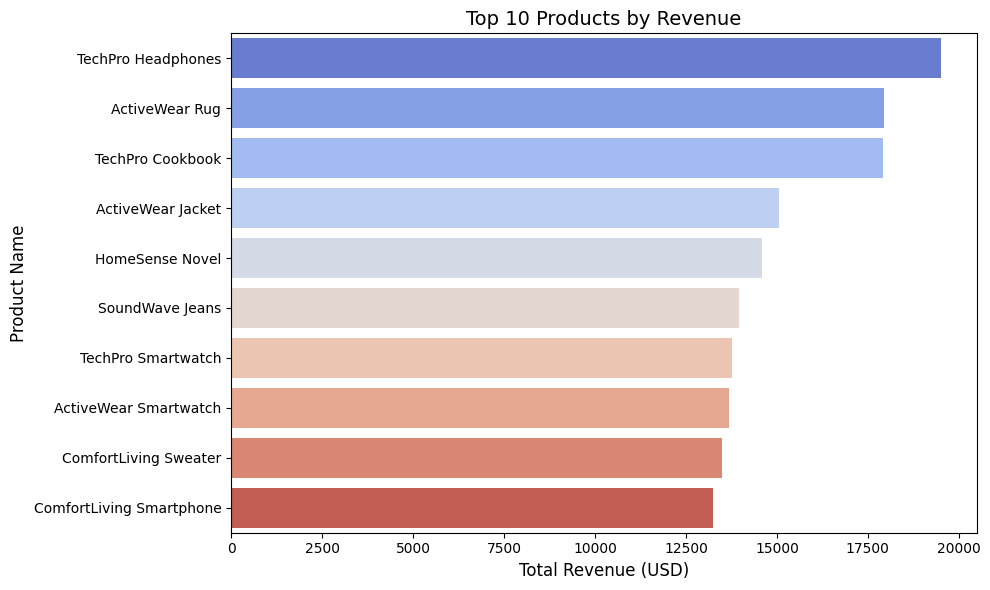

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='coolwarm')
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

# Using ML(Random Forest for getting more insights and evaluating model accuracy, precision, and recall using the classification report).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

# Preparation of data
transactions_customers['TotalTransactions'] = transactions_customers.groupby('CustomerID')['TransactionID'].transform('count')
transactions_customers['AverageValue'] = transactions_customers.groupby('CustomerID')['TotalValue'].transform('mean')

# Creating target variable: High Revenue (Threshold: Top 20% customers)
threshold = transactions_customers['TotalValue'].quantile(0.8)
transactions_customers['HighRevenue'] = (transactions_customers['TotalValue'] > threshold).astype(int)

# Selecting features tha apply
features = ['Region', 'TotalTransactions', 'AverageValue']
X = pd.get_dummies(transactions_customers[features], drop_first=True)
y = transactions_customers['HighRevenue']

# Train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating using trained Random Forest
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[214  24]
 [ 53   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       238
           1       0.27      0.15      0.19        62

    accuracy                           0.74       300
   macro avg       0.54      0.52      0.52       300
weighted avg       0.69      0.74      0.71       300



Feature Importance Visualized

<ipython-input-28-21264b516c08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


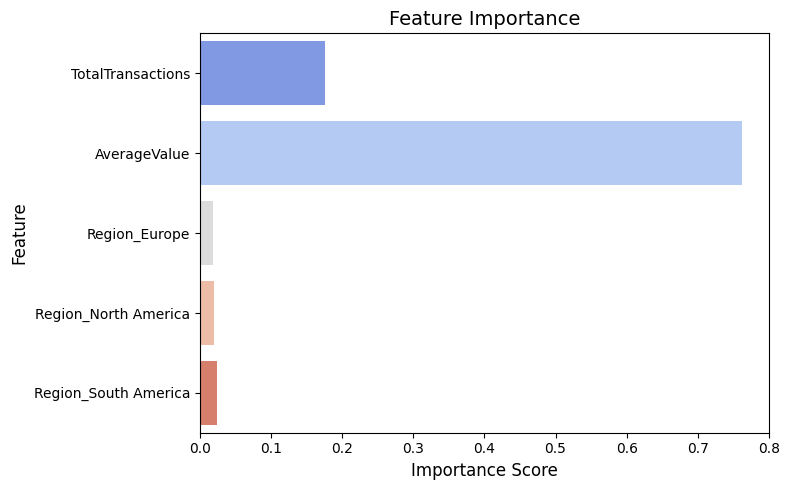

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="coolwarm")
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

Expected transaction value for each customer using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
y_reg = transactions_customers['TotalValue']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))


MSE: 282440.2542340169
R² Score: -0.128426867063002


 Finding similar customers based on their behavior using embeddings

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
leaf_embeddings = rf_model.apply(X_train)
similarities = cosine_similarity(leaf_embeddings)
customer_idx = 0
similar_customers = np.argsort(-similarities[customer_idx])[:20]
print("Top-30 similar customers:", similar_customers)

Top-30 similar customers: [  0 386 385 295  18 297 595  13 774  27 332   2 682 261 757 557 185 312
  67 279]


In [ ]:
# Aggregating transactions
customer_product = transactions.groupby(['CustomerID', 'ProductID']).agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).reset_index()

# Merge with product information
customer_product = customer_product.merge(products, on='ProductID', how='left')

# Adding customer information
customer_product = customer_product.merge(customers, on='CustomerID', how='left')

# Prepare feature set for Random Forest
X = customer_product[['Region', 'Category', 'Price', 'Quantity']]
X = pd.get_dummies(X, drop_first=True)  # Encoding categorical variables
y = customer_product['TotalValue']  # Target variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
customer_product['PredictedValue'] = rf_reg.predict(X)


<ipython-input-50-dabed5b57619>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


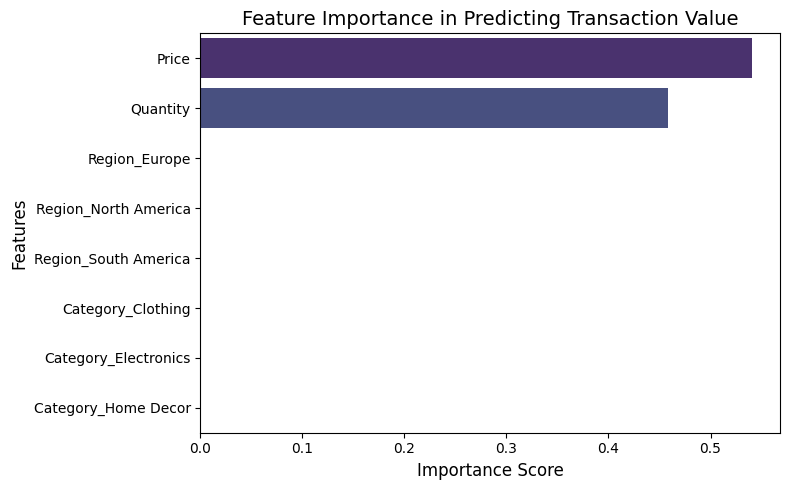

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_reg.feature_importances_
feature_names = X.columns

# Bar plot for feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance in Predicting Transaction Value', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


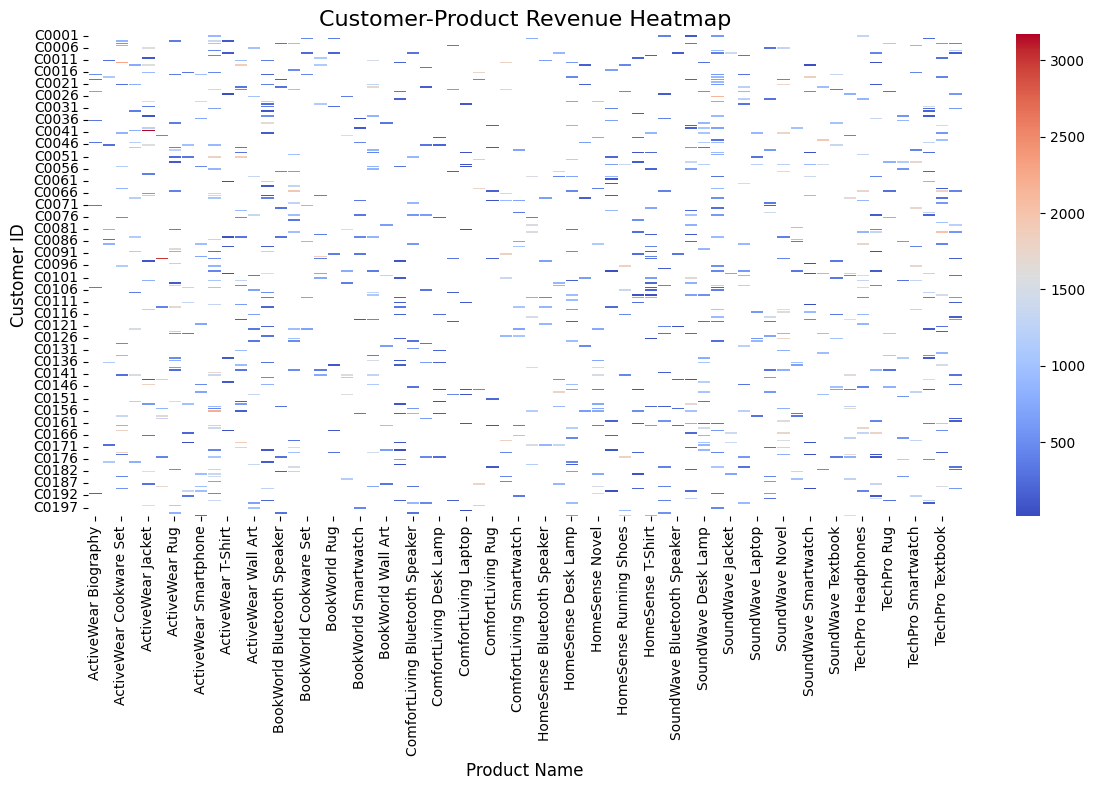

In [ ]:
# Pivot table for heatmap
heatmap_data = customer_product.pivot_table(
    index='CustomerID', columns='ProductName', values='TotalValue', aggfunc='sum'
)

# Visualizing heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title("Customer-Product Revenue Heatmap", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Customer ID", fontsize=12)
plt.tight_layout()
plt.show()
